In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms


from model_harness import ModelHarness
import utils

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Create datasets for training & validation, download if necessary
training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)

# Create data loaders for our datasets; shuffle for training, not for validation
training_loader = torch.utils.data.DataLoader(training_set, batch_size=32, shuffle=True, num_workers=2)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=32, shuffle=False, num_workers=2)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Report split sizes
print('Training set has {} instances'.format(len(training_set)))
print('Validation set has {} instances'.format(len(validation_set)))

Training set has 60000 instances
Validation set has 10000 instances


In [3]:
import torch.nn as nn
import torch.nn.functional as F

# PyTorch models inherit from torch.nn.Module
class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = GarmentClassifier()
model

GarmentClassifier(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [4]:
trainer = ModelHarness(model,
                       torch.nn.CrossEntropyLoss(),
                       torch.optim.Adam,
                       learning_rate = 0.001)

In [5]:
hist = trainer.train(training_loader, 15)

Epoch 1
1875/1875[====================] 1 min 8.42 sec - Loss: 0.6200 - Accuracy: 76.66%
Epoch 2
1875/1875[====================] 1 min 7.84 sec - Loss: 0.3856 - Accuracy: 85.93%
Epoch 3
1875/1875[====================] 1 min 13.73 sec - Loss: 0.3326 - Accuracy: 87.85%
Epoch 4
1875/1875[====================] 1 min 8.67 sec - Loss: 0.3013 - Accuracy: 88.93%
Epoch 5
1875/1875[====================] 1 min 14.90 sec - Loss: 0.2771 - Accuracy: 89.71%
Epoch 6
1875/1875[====================] 1 min 19.02 sec - Loss: 0.2605 - Accuracy: 90.24%
Epoch 7
1875/1875[====================] 1 min 12.13 sec - Loss: 0.2464 - Accuracy: 90.80%
Epoch 8
1875/1875[====================] 1 min 9.08 sec - Loss: 0.2310 - Accuracy: 91.33%
Epoch 9
1875/1875[====================] 1 min 8.99 sec - Loss: 0.2191 - Accuracy: 91.69%
Epoch 10
1875/1875[====================] 1 min 9.18 sec - Loss: 0.2088 - Accuracy: 92.12%
Epoch 11
1875/1875[====================] 1 min 9.35 sec - Loss: 0.1993 - Accuracy: 92.56%
Epoch 12
1875/1

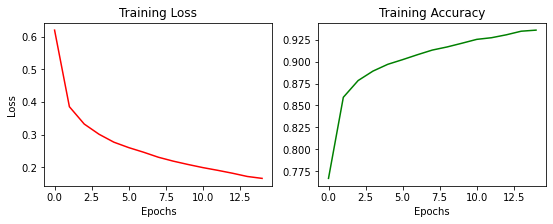

In [6]:
utils.plot_history(hist)

In [7]:
_, _, _ = trainer.evaluate(validation_loader)

313/313[====================] 3.7799 sec - Accuracy 89.17%
